In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [17]:
X, y = make_classification(
    n_samples = 400, n_features=2, n_redundant=0, n_informative=2,
      random_state=3, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += rng.uniform(size=X.shape)

# data = train_test_split(X, y, stratify=y, random_state=16) 
# X_train, X_test, y_train, y_test = data_prep(data,15)

datasets = [
    # Generation of the whole dataset
    make_circles(n_samples=400, noise=0.1, random_state=16, factor = 0.2),
    make_moons(n_samples=400, noise=0.15, random_state=16),
    (X,y)
    # X_train, X_test, y_train, y_test = data_prep(data,15)
    # linearly_separable,
]

In [18]:
# names = ['circles_nt', 'circles_t','circles_bt', 'moons_nt','moons_t', 
#          'moons_bt', 'linear_nt', 'linear_t', 'linear_bt'] 

names = ['circles_nt', 'circles_t', 'moons_nt','moons_t', 
         'linear_nt', 'linear_t'] 

# names = ['circles', 'moons', 'linear'] 
scores = [0.63, 1.00, 0.71, 0.99, 0.84, 0.97]
def read_data(file_path, pos):
    if pos not in names:

        raise ValueError("wrong name of the dataset")
    
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith(pos):                
                array_data_str = line[len(pos) + 1 :]
                # Convert the space-separated string to a list of integers
                array_data = list(map(float, array_data_str.split()))
    return np.array(array_data, dtype=int)

file_path = 'results.txt'

In [19]:
def data_prep(dataset, train_size):
    X_train, X_test, y_train, y_test = dataset 

    # Separated class preparation
    class_1 = [i for i in range(0,len(y_train)) if y_train[i]==0]
    class_2 = [i for i in range(0,len(y_train)) if y_train[i]==1]
    X_train_1 = np.array([X_train[x] for x in class_1])
    X_train_2 = np.array([X_train[x] for x in class_2])
    X_train = np.array([X_train[x] for x in (class_1+class_2)])
    y_train = np.array([y_train[x] for x in (class_1[:train_size]+class_2[:train_size])])

    # Chose the first 30 points for training
    X_train_1 = X_train_1[:train_size]
    X_train_2 = X_train_2[:train_size]
    X_train = np.concatenate((X_train_1, X_train_2), axis=0)

    class_1_test = [i for i in range(0,len(y_test)) if y_test[i]==0]
    class_2_test = [i for i in range(0,len(y_test)) if y_test[i]==1]
    X_test = np.array([X_test[x] for x in (class_1_test+class_2_test)])
    y_test = np.array([y_test[x] for x in (class_1_test+class_2_test)])

    dataset_prep = X_train, X_test, y_train, y_test
    return dataset_prep

def get_limits(dataset): 
    X, _ = dataset
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    return x_min - 0.5, x_max + 0.5, y_min - 0.5, y_max + 0.5

In [20]:
for k in range(len(datasets)):
    x_min, x_max, y_min, y_max = get_limits(datasets[k])
    print(x_min, x_max, y_min, y_max )

-1.6904101749123441 1.6765551205889364 -1.7397662285074948 1.6204445810418595
-1.8144828590047428 2.858477478347186 -1.2898392852573644 1.7479557724053438
-2.381085309669609 4.225935291156302 -2.143380343035548 3.0942201062683656


2
Row is  1
Column is  1 Elemnt is  0 Name is circles_nt
shapes are (441,) 441
Column is  2 Elemnt is  1 Name is circles_t
shapes are (441,) 441
5
Row is  2
Column is  1 Elemnt is  2 Name is moons_nt
shapes are (315,) 315
Column is  2 Elemnt is  3 Name is moons_t
shapes are (315,) 315
8
Row is  3
Column is  1 Elemnt is  4 Name is linear_nt
shapes are (357,) 357
Column is  2 Elemnt is  5 Name is linear_t
shapes are (357,) 357


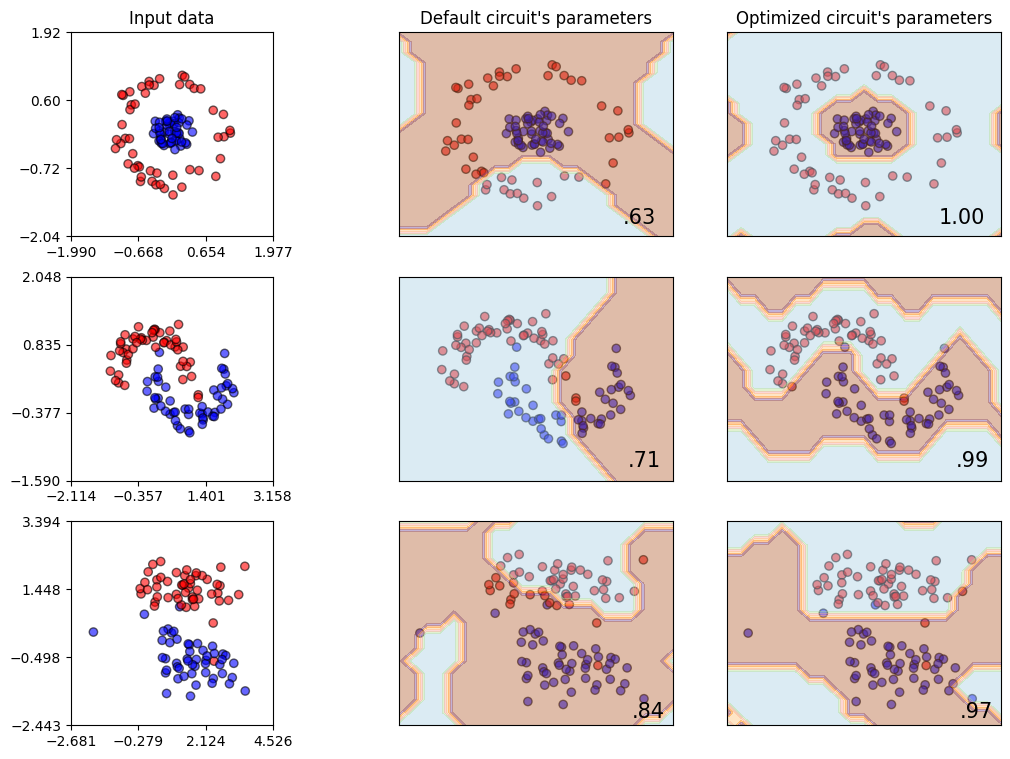

In [50]:
figure = plt.figure(figsize=(12, 9))
i = 1
line_counter = 0
# iterate over datasets
for k in range(len(datasets)):
    X, y = datasets[k]
    # data = train_test_split(X, y, stratify=y, random_state=16) 
    # X_train, X_test, y_train, y_test = data_prep(data,15)

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=16) 

    x_min, x_max, y_min, y_max = get_limits(datasets[k])
    h = (x_max - x_min)/20

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), 4, (i-1)*4+1)
    print((i-1)*3+2)
    if line_counter ==0:
        ax.set_title("Input data")
    print('Row is ', i)
    # Plot the training points
    # ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min- 0.3, x_max+ 0.3)
    ax.set_ylim(y_min- 0.3, y_max+ 0.3)
    # ax.set_xlabel('Feature #1')
    # ax.set_ylabel('Feature #2')
    # ax.xticks(np.linspace(-2,2,16))
    
    # ax.xticks()
    ax.set_xticks(np.linspace(x_min - 0.3,x_max + 0.3,4))
    ax.set_yticks(np.linspace(y_min - 0.3,y_max + 0.3,4))

    # for name in names:
    for j in range(1,3):
        ax = plt.subplot(len(datasets), 3, j + (i-1)*3 + 1)
        xx, yy = np.meshgrid(np.arange(x_min, x_max+h, h), np.arange(y_min, y_max+h, h))

        cm = plt.cm.RdBu
        cm_bright = ListedColormap(["#FF0000", "#0000FF"])
        print('Column is ', j, 'Elemnt is ', (i-1)*2 + (j - 1), 'Name is', names[(i-1)*2 + (j - 1)] )
        Z = read_data('results.txt', names[(i-1)*2 + (j - 1)])
        print("shapes are", Z.shape, xx.shape[0] * xx.shape[1])
        Z = Z.reshape(xx.shape)

        # Plot the training points
        # ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
        # Plot the testing points
        ax.scatter(
            X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
        )
        ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.4)
        if j == 1 and i == 1:
            ax.set_title("Default circuit's parameters")
        if j == 2 and i == 1:
            ax.set_title("Optimized circuit's parameters")
        if j == 3 and i == 1:
            ax.set_title("Optimized circuit's parameters (batches)")
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        # ax.set_xlabel('Feature #1')
        # ax.set_ylabel('Feature #2')
        ax.grid()
        ax.text(
            x_max - 0.2,
            y_min + 0.2,
            ("%.2f" % scores[j + (i-1)*2 - 1]).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
    line_counter+=1
    i += 1

# plt.tight_layout()
plt.show()